In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")


%store -r WORKDIR

if 'WORKDIR' not in dir():
    WORKDIR = 'C:/Users/Paulo/Desktop/infnet-projeto-final/mit_data_science/'

data_raw_file = WORKDIR + '/Data/Raw/nyctaxi_data_collect_yellow.parquet'
data_proc_file = WORKDIR + '/Data/Processed/nyctaxi_data_modeling_yellow.parquet'


pd.plotting.register_matplotlib_converters()

# Leitura dos Dados 

In [19]:
data = pd.read_parquet(data_raw_file)

print('shape:', data.shape)
print('columns:', data.columns)
data.head()

shape: (8000, 10)
columns: Index(['dropoff_datetime', 'dropoff_latitude', 'dropoff_longitude',
       'fare_amount', 'passenger_count', 'pickup_datetime', 'pickup_latitude',
       'pickup_longitude', 'tpep_dropoff_datetime', 'tpep_pickup_datetime'],
      dtype='object')


,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,tpep_dropoff_datetime,tpep_pickup_datetime
0,None,None,None,10,1,None,None,None,2084-11-04T12:47:41.000,2084-11-04T12:32:24.000
1,None,None,None,10,1,None,None,None,2084-11-04T12:47:41.000,2084-11-04T12:32:24.000
2,None,None,None,4,1,None,None,None,2084-11-04T12:29:00.000,2084-11-04T12:25:53.000
3,None,None,None,4,1,None,None,None,2084-11-04T12:29:00.000,2084-11-04T12:25:53.000
4,None,None,None,10,1,None,None,None,2084-11-04T12:22:24.000,2084-11-04T12:08:33.000


# Estatistica dos dados 

In [20]:
data.describe()

,dropoff_datetime,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,tpep_dropoff_datetime,tpep_pickup_datetime
count,3000,6000,6000,8000,8000,2000,6000,6000,5000,6000
unique,2999,5699,5555,216,7,2000,5682,5521,4634,5338
top,2011-05-09T18:12:00.000,0,0,6.5,1,2015-06-08T19:06:11.000,0,0,2018-12-31T23:58:13.000,2017-02-23T05:38:02.000
freq,2,114,115,410,5689,1,114,114,5,5


In [21]:
data.dtypes

dropoff_datetime         object
dropoff_latitude         object
dropoff_longitude        object
fare_amount              object
passenger_count          object
pickup_datetime          object
pickup_latitude          object
pickup_longitude         object
tpep_dropoff_datetime    object
tpep_pickup_datetime     object
dtype: object

# Correção do tipo dos dados

In [22]:
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime, format='%Y-%m-%d %H:%M:%S')
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime, format='%Y-%m-%d %H:%M:%S')
data['tpep_pickup_datetime'] = pd.to_datetime(data.tpep_pickup_datetime, format='%Y-%m-%d %H:%M:%S')
data['tpep_dropoff_datetime'] = pd.to_datetime(data.tpep_dropoff_datetime, format='%Y-%m-%d %H:%M:%S')

data_types = {
    'fare_amount': float,
    'pickup_latitude': float,
    'pickup_longitude': float,
    'dropoff_latitude': float,
    'pickup_latitude': float,
    'dropoff_longitude': float,  
    'passenger_count': int
}
for cname, dtype in data_types.items():
    if dtype == np.float32:
        data.loc[data[cname].astype(str) == '',cname] = '0'
    
    data[cname] = data[cname].astype(dtype)
    
data.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude
count,6000.000000,6000.000000,8000.000000,8000.000000,6000.000000,6000.000000
mean,39.938102,-72.507108,12.546251,1.652625,39.937463,-72.531132
std,5.940305,10.385885,10.744629,1.311553,5.940115,10.309993
min,-74.011015,-74.241305,-5.000000,0.000000,-73.991172,-74.182447
25%,40.732948,-73.991529,6.100000,1.000000,40.734170,-73.991982
50%,40.752966,-73.979864,9.000000,1.000000,40.752548,-73.981833
75%,40.767573,-73.962920,14.100000,2.000000,40.767041,-73.967386
max,40.938418,40.796100,100.000000,6.000000,40.895650,40.774510


In [23]:
data.dtypes

dropoff_datetime         datetime64[ns]
dropoff_latitude                float64
dropoff_longitude               float64
fare_amount                     float64
passenger_count                   int32
pickup_datetime          datetime64[ns]
pickup_latitude                 float64
pickup_longitude                float64
tpep_dropoff_datetime    datetime64[ns]
tpep_pickup_datetime     datetime64[ns]
dtype: object

In [24]:
### Convertendo a distancia de milhas para kilometros

# Verificar Valores Nulos

In [25]:
data.isna().sum()

dropoff_datetime         5000
dropoff_latitude         2000
dropoff_longitude        2000
fare_amount                 0
passenger_count             0
pickup_datetime          6000
pickup_latitude          2000
pickup_longitude         2000
tpep_dropoff_datetime    3000
tpep_pickup_datetime     2000
dtype: int64

In [26]:
data.update(data['pickup_datetime'].fillna(data['tpep_pickup_datetime']))
data.drop(['tpep_dropoff_datetime','tpep_pickup_datetime', 'dropoff_datetime'], axis = 1, inplace = True)
#data.dropna(inplace = True)

In [27]:
data.isna().sum()

dropoff_latitude     2000
dropoff_longitude    2000
fare_amount             0
passenger_count         0
pickup_datetime         0
pickup_latitude      2000
pickup_longitude     2000
dtype: int64

# Variável Alvo 

In [28]:
data.groupby('fare_amount').fare_amount.last().sort_values(ascending=False).head(10)

fare_amount
100.0    100.0
96.5      96.5
96.0      96.0
75.5      75.5
75.0      75.0
73.0      73.0
72.7      72.7
69.5      69.5
68.5      68.5
67.0      67.0
Name: fare_amount, dtype: float64

## Verificação das Variáveis

#### pickup_datetime

In [51]:
data['pickup_datetime'].describe()

count                    8000
unique                   7338
top       2018-12-31 23:51:33
freq                        5
first     2011-01-01 02:22:26
last      2084-11-04 12:32:24
Name: pickup_datetime, dtype: object

Plotando um histograma para verificar a distribuição

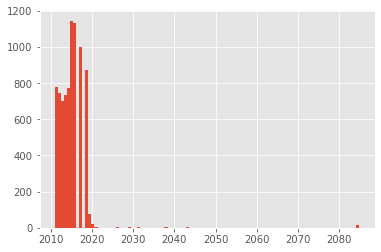

In [52]:
plt.hist(data['pickup_datetime'], bins = 100);

### Coordenadas

#### `pickup_longitude`

In [53]:
plon = data['pickup_longitude']
plon.describe()

count    6000.000000
mean      -72.531132
std        10.309993
min       -74.182447
25%       -73.991982
50%       -73.981833
75%       -73.967386
max        40.774510
Name: pickup_longitude, dtype: float64

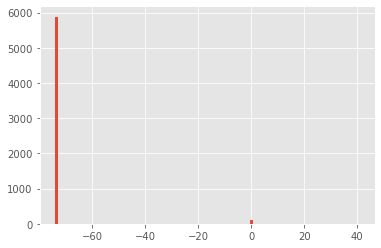

In [54]:
plt.hist(plon, bins = 100);

In [55]:
plon.median()

-73.98183270581055

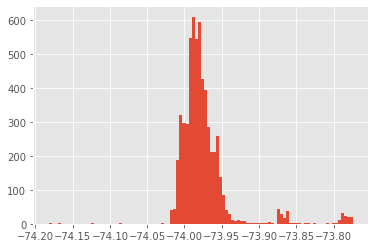

In [56]:
plt.hist(plon[(plon > plon.median() - 1.5) & (plon < plon.median() + 1.5)], bins = 100);

Criando uma condição para pegar somente as coordenadas dentro do intervalo do zoom.

In [57]:
plon_val = (plon > plon.median() - 0.5) & (plon < plon.median() + 0.5)

In [58]:
plon_val.value_counts()

True     5884
False    2116
Name: pickup_longitude, dtype: int64

In [59]:
print(plon_val.value_counts(), '\n', plon_val.value_counts(normalize = True))

True     5884
False    2116
Name: pickup_longitude, dtype: int64 
 True     0.7355
False    0.2645
Name: pickup_longitude, dtype: float64


Podemos verificar que os valores 'outliers' representam 1.7% da base, então poderemos remove-los sem impactar nossa analise

#### pickup_latitude


In [60]:
plat = data['pickup_latitude']
plat.describe()

count    6000.000000
mean       39.937463
std         5.940115
min       -73.991172
25%        40.734170
50%        40.752548
75%        40.767041
max        40.895650
Name: pickup_latitude, dtype: float64

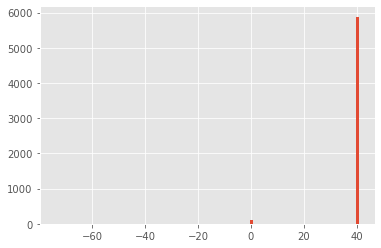

In [61]:
plt.hist(plat, bins = 100);

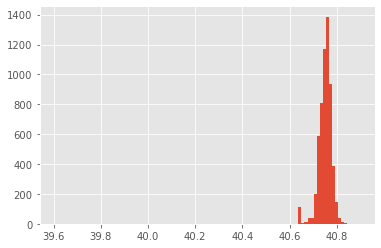

In [62]:
plt.hist(plat[(plat > plat.median() - 2.5) & (plat < plat.median() + 2.5)], bins = 100);

In [63]:
plat_val = (plat > plat.median() - 0.5) & (plat < plat.median() + 0.5)
print(plat_val.value_counts(), '\n', plat_val.value_counts(normalize = True))

True     5882
False    2118
Name: pickup_latitude, dtype: int64 
 True     0.73525
False    0.26475
Name: pickup_latitude, dtype: float64


#### dropoff_longitude

In [64]:
dlon = data['dropoff_longitude']
dlon.describe()

count    6000.000000
mean      -72.507108
std        10.385885
min       -74.241305
25%       -73.991529
50%       -73.979864
75%       -73.962920
max        40.796100
Name: dropoff_longitude, dtype: float64

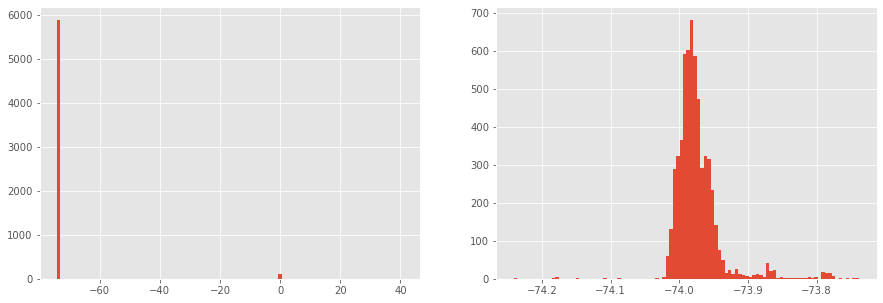

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dlon, bins = 100)
ax[1].hist(dlon[(dlon > dlon.median() - 2.5) & (dlon < dlon.median() + 2.5)], bins = 100);

In [66]:
dlon_val = (dlon > dlon.median() - 0.5) & (dlon < dlon.median() + 0.5)
print(dlon_val.value_counts(), '\n', dlon_val.value_counts(normalize = True))

True     5882
False    2118
Name: dropoff_longitude, dtype: int64 
 True     0.73525
False    0.26475
Name: dropoff_longitude, dtype: float64


#### dropoff_latitude


In [67]:
dlat = data['dropoff_latitude']
dlat.describe()

count    6000.000000
mean       39.938102
std         5.940305
min       -74.011015
25%        40.732948
50%        40.752966
75%        40.767573
max        40.938418
Name: dropoff_latitude, dtype: float64

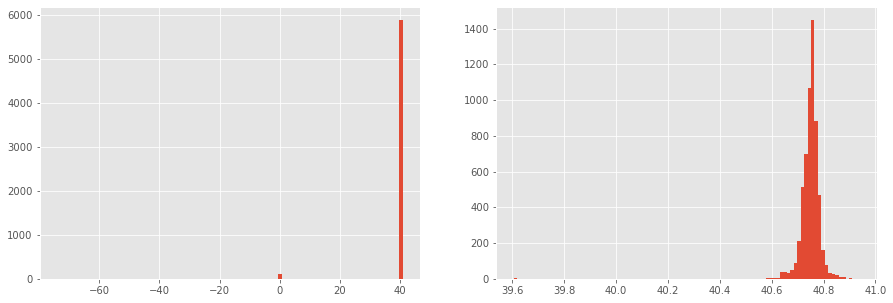

In [68]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].hist(dlat, bins = 100)
ax[1].hist(dlat[(dlat > dlat.median() - 2.5) & (dlat < dlat.median() + 2.5)], bins = 100);

In [69]:
dlat_val = (dlat > dlat.median() - 0.5) & (dlat < dlat.median() + 0.5)
print(dlat_val.value_counts(), '\n', dlat_val.value_counts(normalize = True))

True     5882
False    2118
Name: dropoff_latitude, dtype: int64 
 True     0.73525
False    0.26475
Name: dropoff_latitude, dtype: float64


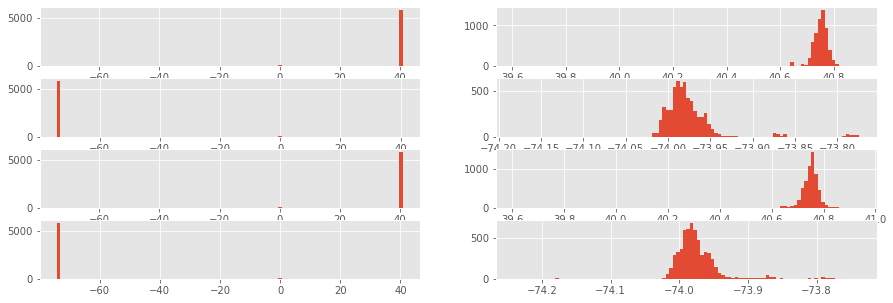

In [70]:
fig, ax = plt.subplots(4, 2, figsize = (15, 5))
ax[0,0].hist(plat, bins = 100)
ax[0,1].hist(plat[(plat > plat.median() - 2.5) & (plat < plat.median() + 2.5)], bins = 100);
ax[1,0].hist(plon, bins = 100)
ax[1,1].hist(plon[(plon > plon.median() - 2.5) & (plon < plon.median() + 2.5)], bins = 100);
ax[2,0].hist(dlat, bins = 100)
ax[2,1].hist(dlat[(dlat > dlat.median() - 2.5) & (dlat < dlat.median() + 2.5)], bins = 100);
ax[3,0].hist(dlon, bins = 100)
ax[3,1].hist(dlon[(dlon > dlon.median() - 2.5) & (dlon < dlon.median() + 2.5)], bins = 100);

### Inteiros

#### `passenger_count`

In [72]:
pcnt = data['passenger_count']
pcnt.describe()

count    8000.000000
mean        1.652625
std         1.311553
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

Verificar quantos valores igual a zero e a média deles

In [73]:
print((pcnt == 0).sum(), (pcnt == 0).mean())

34 0.00425


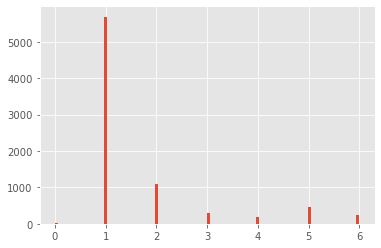

In [74]:
plt.hist(pcnt, bins = 100);

In [75]:
pcnt_val = (pcnt >= 1) & (pcnt <= 6)
print(pcnt_val.value_counts(), '\n', pcnt_val.value_counts(normalize = True))

True     7966
False      34
Name: passenger_count, dtype: int64 
 True     0.99575
False    0.00425
Name: passenger_count, dtype: float64


### Floats

#### `fare_amount`

In [76]:
fare = data['fare_amount']
fare.describe()

count    8000.000000
mean       12.546251
std        10.744629
min        -5.000000
25%         6.100000
50%         9.000000
75%        14.100000
max       100.000000
Name: fare_amount, dtype: float64

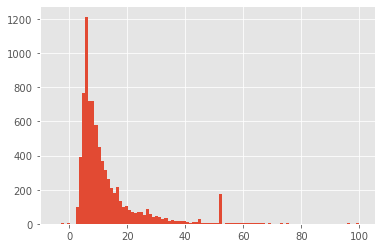

In [77]:
plt.hist(fare, bins = 100);

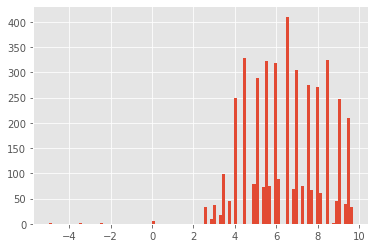

In [78]:
plt.hist(fare[fare < 10], bins = 100);

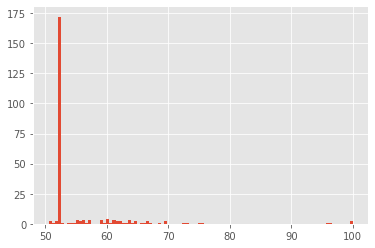

In [79]:
plt.hist(fare[fare > 50], bins = 100);

Removendo os outliers

In [80]:
fare_val = (fare > 2) & (fare < 150)
print(fare_val.value_counts(), '\n', fare_val.value_counts(normalize = True))

True     7991
False       9
Name: fare_amount, dtype: int64 
 True     0.998875
False    0.001125
Name: fare_amount, dtype: float64


Unindo todas as analises realizadas para exclusão dos registros em lote

In [81]:
val_entries = fare_val & plon_val & plat_val & dlon_val & dlat_val & pcnt_val

In [82]:
print(val_entries.value_counts(), '\n', val_entries.value_counts(normalize = True))

True     5849
False    2151
dtype: int64 
 True     0.731125
False    0.268875
dtype: float64


POdemos verificar que os registros inconsistentes representam 2.2% da nossa base, então não teremos tanto impacto para remove-los

In [83]:
data = data.drop(val_entries[val_entries == False].index)

In [84]:
data.head()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude
2000,40.753777,-73.987465,12.0,1,2016-02-04 08:32:14,40.764282,-73.969154
2001,40.788132,-73.978127,5.0,1,2016-02-13 21:58:56,40.780354,-73.976402
2002,40.776989,-73.963516,6.0,1,2016-02-23 19:16:09,40.781178,-73.975861
2003,40.756050,-73.967773,7.5,1,2016-02-09 13:33:08,40.764771,-73.988289
2004,40.763859,-73.995766,8.5,1,2016-02-10 13:30:03,40.778614,-73.977974


In [86]:
data.shape

(5849, 7)

# Exportar Base de Dados 

In [87]:
data.to_parquet(data_proc_file)